Autor : Juan Carlos López Jerez

# BASE DE DATOS No SQL

## Conjunto de datos de estadísticas de equipos de fútbol.

En este caso, tenemos un conjunto de datos que contiene información detallada sobre las estadísticas de equipos de fútbol de varias ligas europeas. Estos datos incluyen varias métricas clave de rendimiento, como goles, tiros por partido, tarjetas amarillas y rojas, posesión, porcentaje de pases, y más, de equipos de ligas como la Premier League inglesa, la Liga 1 francesa, la Bundesliga alemana, la Serie A italiana, y la Liga española. 

1.-Clasificaciones y estadísticas de los equipos de fútbol de las siguientes ligas:

Liga Premier League

Liga 1 francesa

Bundesliga alemana

Serie A italiana

La Liga española


2.-Cada fila contiene información sobre un equipo. Los datos muestran las siguientes estadísticas para cada equipo:

Equipo - Nombre del equipo

Torneo - Nombre del torneo

Goles - Número de goles marcados en el torneo en el año 2020-2021

Tiros pg - Número de tiros por partido

Tarjetas amarillas - Número de tarjetas amarillas mostradas en el torneo en el año 2020-2021

Tarjetas rojas - Número de tarjetas rojas mostradas en el torneo en el año 2020-2021

Posesión% - Porcentaje de posesión

Pass% - Porcentaje de pases acertados

Duelos aéreos ganados: duelos aéreos ganados por partido. Los duelos aéreos ocurren cuando dos jugadores disputan una pelota en el aire.

Calificación - Calificación general del equipo

In [1]:
# Importamos las librerías necesarias para la tarea.
from pymongo import MongoClient
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Conectar a MongoDB (en caso de usar MongoDB local, usa la URI local, o en el caso de usar MongoDB Atlas, usa la URI proporcionada)
client = MongoClient("mongodb://localhost:27017/")

# Selecciono la base de datos
db = client["Tarea"]

# Selecciono la colección 
coleccion = db["football_teams"]

In [2]:
# Obtener todos los documentos de la colección y visualizarlos en un dataframe.
documentos = coleccion.find()
df = pd.DataFrame(documentos)
df

,_id,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,6751e3b72f52b23c1fe54c09,Manchester City,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01
1,6751e3b72f52b23c1fe54c0a,Bayern Munich,Bundesliga,99,17.1,44,3,58.1,85.5,12.9,6.95
2,6751e3b72f52b23c1fe54c0b,Paris Saint-Germain,Ligue 1,86,15.0,73,7,60.1,89.5,9.5,6.88
3,6751e3b72f52b23c1fe54c0c,Barcelona,LaLiga,85,15.3,68,2,62.4,89.7,10.6,6.87
4,6751e3b72f52b23c1fe54c0d,Real Madrid,LaLiga,67,14.4,57,2,57.7,87.7,11.8,6.86
...,...,...,...,...,...,...,...,...,...,...,...
93,6751e3b72f52b23c1fe54c66,Sheffield United,Premier League,20,8.5,73,3,43.0,76.9,19.1,6.46
94,6751e3b72f52b23c1fe54c67,Crotone,Serie A,45,9.5,85,4,47.2,80.4,12.7,6.43
95,6751e3b72f52b23c1fe54c68,Benevento,Serie A,40,11.0,90,5,44.2,77.7,13.4,6.43
96,6751e3b72f52b23c1fe54c69,Dijon,Ligue 1,25,9.2,75,5,46.9,80.0,14.3,6.42


### Query 1

Obtener los tres mejores equipos de La Liga según su valoración de manera descendente con todas sus estadísticas y campos.

In [3]:
# Filtramos por el torneo LaLiga
query1 = { 'Tournament': 'LaLiga' }
fase1 = { '$match': query1 }
# Ordenamos por Rating de mayor a menor
query2 = { 'Rating': -1 }
fase2 = { '$sort': query2 }
# Mostramos los 3 primeros resultados
fase3 = { '$limit': 3 }
etapas = [ fase1, fase2, fase3 ]

resultados = coleccion.aggregate(etapas) 

# Convertir el resultado en un DataFrame de pandas
df = pd.DataFrame(resultados)  
df

,_id,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,6751e3b72f52b23c1fe54c0c,Barcelona,LaLiga,85,15.3,68,2,62.4,89.7,10.6,6.87
1,6751e3b72f52b23c1fe54c0d,Real Madrid,LaLiga,67,14.4,57,2,57.7,87.7,11.8,6.86
2,6751e3b72f52b23c1fe54c12,Atletico Madrid,LaLiga,67,12.1,100,0,51.8,83.1,14.4,6.84


In [4]:
# El ObjectId hay que convertirlo en algo legible para Python (String) por su codificación o eliminarlo para verlo en formato JSON.
df['_id'] = df['_id'].astype(str)

# Convertir el DataFrame a JSON
resultados_json = df.to_json(orient='records', indent=4)

# Mostrar el JSON
print(resultados_json)

[
    {
        "_id":"6751e3b72f52b23c1fe54c0c",
        "Team":"Barcelona",
        "Tournament":"LaLiga",
        "Goals":85,
        "Shots pg":15.3,
        "yellow_cards":68,
        "red_cards":2,
        "Possession%":62.4,
        "Pass%":89.7,
        "AerialsWon":10.6,
        "Rating":6.87
    },
    {
        "_id":"6751e3b72f52b23c1fe54c0d",
        "Team":"Real Madrid",
        "Tournament":"LaLiga",
        "Goals":67,
        "Shots pg":14.4,
        "yellow_cards":57,
        "red_cards":2,
        "Possession%":57.7,
        "Pass%":87.7,
        "AerialsWon":11.8,
        "Rating":6.86
    },
    {
        "_id":"6751e3b72f52b23c1fe54c12",
        "Team":"Atletico Madrid",
        "Tournament":"LaLiga",
        "Goals":67,
        "Shots pg":12.1,
        "yellow_cards":100,
        "red_cards":0,
        "Possession%":51.8,
        "Pass%":83.1,
        "AerialsWon":14.4,
        "Rating":6.84
    }
]


### CAMPOS REQUERIDOS DE LA QUERY 1

Obtener los tres mejores equipos de La Liga según su valoración de manera descendente mostrando los campos Team, Tournament y Rating

In [5]:
# Filtramos por el torneo LaLiga
query1 = { 'Tournament': 'LaLiga' }
fase1 = { '$match': query1 }
# Ordenamos por Rating de mayor a menor
query2 = { 'Rating': -1 }
fase2 = { '$sort': query2 }
# Mostramos los 3 primeros resultados
fase3 = { '$limit': 3 }
etapas = [ fase1, fase2, fase3 ]
# Mostramos los campos requeridos
fase4 = { '$project': { "_id" : 0, 'Team' : 1, 'Tournament' : 1, 'Rating' : 1 } }
etapas = [ fase1, fase2, fase3, fase4 ]

resultados = coleccion.aggregate(etapas) 

# Convertir el resultado en un DataFrame de pandas
df = pd.DataFrame(resultados)  
df

,Team,Tournament,Rating
0,Barcelona,LaLiga,6.87
1,Real Madrid,LaLiga,6.86
2,Atletico Madrid,LaLiga,6.84


In [6]:
# Convertir el DataFrame a JSON
resultados_json = df.to_json(orient='records', indent=4)

# Mostrar el JSON
print(resultados_json)

[
    {
        "Team":"Barcelona",
        "Tournament":"LaLiga",
        "Rating":6.87
    },
    {
        "Team":"Real Madrid",
        "Tournament":"LaLiga",
        "Rating":6.86
    },
    {
        "Team":"Atletico Madrid",
        "Tournament":"LaLiga",
        "Rating":6.84
    }
]


### QUERY 2

Obtener el número total de tarjetas amarillas y rojas por ligas, y ordenar por tajetas amarillas de mayor a menor.


In [7]:
# Fase 1: Agrupar los equipos por el torneo y sumar las tarjetas amarillas y rojas
fase1 = { '$group': { "_id": '$Tournament', "total_yellow_cards": { "$sum": "$yellow_cards" } , "total_red_cards": { "$sum": "$red_cards" } } }
# Fase 2: Ordenar por el total de tarjetas amarillas de mayor a menor
fase2 = { "$sort": { "total_yellow_cards": -1 } }
# Fase 3: Renombrar y mostrar campos
fase3 = { '$project': { "_id" : 0, 'Tournament' : '$_id', "tarjetas_amarillas": "$total_yellow_cards", "tarjetas_rojas": "$total_red_cards" } }
etapas = [ fase1, fase2, fase3 ]

resultados = coleccion.aggregate(etapas) 

# Visualizarlo en un DataFrame
df = pd.DataFrame(resultados)  
df

,Tournament,tarjetas_amarillas,tarjetas_rojas
0,LaLiga,1639,75
1,Serie A,1597,69
2,Ligue 1,1419,102
3,Premier League,1095,48
4,Bundesliga,1081,33


In [8]:
# Convertir el DataFrame a JSON
resultados_json = df.to_json(orient='records', indent=4)

# Mostrar el JSON
print(resultados_json)

[
    {
        "Tournament":"LaLiga",
        "tarjetas_amarillas":1639,
        "tarjetas_rojas":75
    },
    {
        "Tournament":"Serie A",
        "tarjetas_amarillas":1597,
        "tarjetas_rojas":69
    },
    {
        "Tournament":"Ligue 1",
        "tarjetas_amarillas":1419,
        "tarjetas_rojas":102
    },
    {
        "Tournament":"Premier League",
        "tarjetas_amarillas":1095,
        "tarjetas_rojas":48
    },
    {
        "Tournament":"Bundesliga",
        "tarjetas_amarillas":1081,
        "tarjetas_rojas":33
    }
]


VISUALIZAR LOS DATOS ENTRE TARJETAS AMARILLAS Y ROJAS POR TORNEO, Y CONTRASTARLO CON NUESTRA QUERY 2.

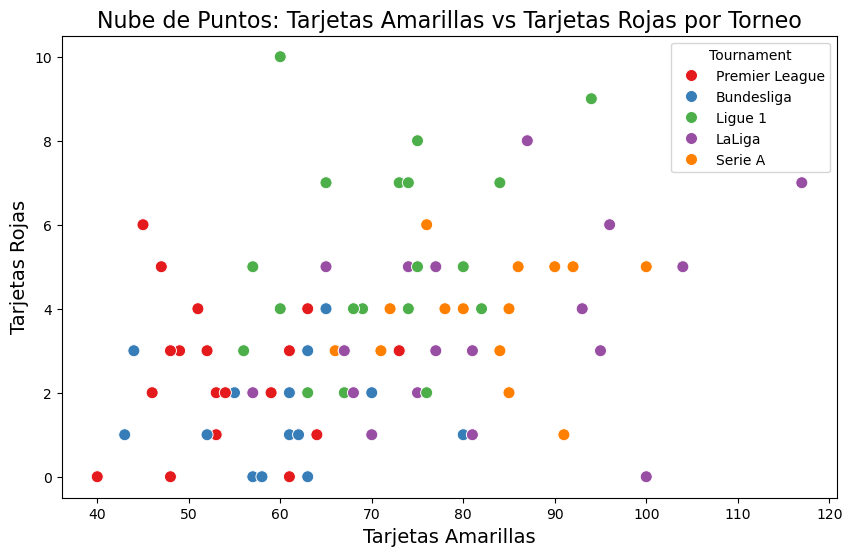

In [9]:
# Obtener todos los documentos de la colección y visualizarlos en un dataframe.
documentos = coleccion.find()
df = pd.DataFrame(documentos)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear la nube de puntos (scatter plot)
sns.scatterplot(x='yellow_cards', y='red_cards', data=df, hue='Tournament', palette='Set1', s=75, marker='o')

# Añadir título y etiquetas
plt.title('Nube de Puntos: Tarjetas Amarillas vs Tarjetas Rojas por Torneo', fontsize=16)
plt.xlabel('Tarjetas Amarillas', fontsize=14)
plt.ylabel('Tarjetas Rojas', fontsize=14)

# Mostrar la gráfica donde cada punto es un equipo.
plt.show()

Para visualizar esta información, creamos una nube de puntos o gráfica de dispersión en la que:

El eje X representa el número de tarjetas amarillas.
El eje Y representa el número de tarjetas rojas.
Cada punto representa un equipo, y el color del punto (usando un color distinto para cada liga) ayuda a identificar en qué liga se encuentra.

Interpretación de la nube de puntos.

Puntos azules y rojos: Estos puntos corresponden a Premier League y Bundesliga, respectivamente. Estos puntos están agrupados en la zona izquierda de la gráfica, lo que significa que estas ligas tienen un menor número de tarjetas (tanto amarillas como rojas).
Puntos verdes, morados y naranjas: Estos puntos representan a las ligas Ligue 1, La Liga y Serie A, respectivamente. Estos puntos se agrupan en la zona derecha de la gráfica, lo que indica que estas ligas tienen un mayor número de tarjetas.
Esto nos permite hacer una interpretación visual clara:

Las ligas Premier League y Bundesliga están asociadas con menos tarjetas amarillas y rojas, lo que podría sugerir un estilo de juego más limpio o un sistema disciplinario diferente.
Las ligas Ligue 1, La Liga y Serie A tienen un mayor número de tarjetas, lo que puede indicar una mayor frecuencia de faltas o sanciones disciplinarias durante los partidos.

Por lo tanto obtenemos las mismas conclusiones que en nuestra Query 2 por los resultados dados

### QUERY 3

Obtener la media de goles y media de tiros por partido de cada liga y ordenarlo de mayor a menor por media de goles. 

In [10]:
# Fase 1: Agrupar los equipos por el torneo y sumar las tarjetas amarillas y rojas
fase1 = { '$group': { "_id": '$Tournament', "media_goles": { "$avg": "$Goals" } , "media_tiros_pg": { "$avg": "$Shots pg" } } }
# Fase 2: Ordenar por el total de tarjetas amarillas de mayor a menor
fase2 = {"$sort": { "media_goles": -1 }}
# Fase 3: Renombrar y mostrar campos
fase3 = { '$project': { "_id" : 0, 'Tournament' : '$_id', "Media_goles": "$media_goles", "Media_tiros_pg": "$media_tiros_pg" } }
etapas = [ fase1, fase2, fase3 ]

resultados = coleccion.aggregate(etapas) 

# Visualizarlo en un DataFrame
df = pd.DataFrame(resultados)  
df

,Tournament,Media_goles,Media_tiros_pg
0,Serie A,58.000000,12.480000
1,Ligue 1,52.450000,11.700000
2,Bundesliga,51.555556,12.372222
3,Premier League,51.200000,12.095000
4,LaLiga,47.650000,10.660000


In [11]:
# Convertir el DataFrame a JSON
resultados_json = df.to_json(orient='records', indent=4)

# Mostrar el JSON
print(resultados_json)

[
    {
        "Tournament":"Serie A",
        "Media_goles":58.0,
        "Media_tiros_pg":12.48
    },
    {
        "Tournament":"Ligue 1",
        "Media_goles":52.45,
        "Media_tiros_pg":11.7
    },
    {
        "Tournament":"Bundesliga",
        "Media_goles":51.5555555556,
        "Media_tiros_pg":12.3722222222
    },
    {
        "Tournament":"Premier League",
        "Media_goles":51.2,
        "Media_tiros_pg":12.095
    },
    {
        "Tournament":"LaLiga",
        "Media_goles":47.65,
        "Media_tiros_pg":10.66
    }
]


### QUERY 4

Obtener el equipo con más y menos posesión por Liga.

In [12]:
# Fase 1: Ordenar por posesión para identificar el equipo con la máxima y mínima posesión por liga
fase1 = {
    '$sort': {
        'Possession%': -1  # Ordenar por posesión en orden descendente (máxima posesión primero)
    }
}

# Fase 2: Agrupar por torneo y obtener el máximo y mínimo de posesión, y los equipos correspondientes
fase2 = {
    '$group': {
        '_id': '$Tournament',  # Agrupar por torneo (liga)
        'max_possession': {'$first': '$Possession%'},  # Primer equipo (máxima posesión)
        'min_possession': {'$last': '$Possession%'},   # Último equipo (mínima posesión)
        'max_pos_team': {'$first': '$Team'},            # Equipo con máxima posesión
        'min_pos_team': {'$last': '$Team'}              # Equipo con mínima posesión
    }
}

# Fase 3: Proyección para mostrar solo los campos relevantes
fase3 = {
    '$project': {
        '_id': 0,  # No mostrar el campo _id
        'Liga': '$_id',  # Mostrar el nombre del torneo (liga)
        'Max_pos': '$max_possession',  # Mostrar la máxima posesión
        'Equipo_max_pos': '$max_pos_team',  # Mostrar el equipo con la máxima posesión
        'Min_pos': '$min_possession',  # Mostrar la mínima posesión
        'Equipo_min_pos': '$min_pos_team'  # Mostrar el equipo con la mínima posesión
    }
}

etapas = [fase1, fase2, fase3]
resultados = coleccion.aggregate(etapas)

# Convertir los resultados a un DataFrame de pandas para visualización
df = pd.DataFrame(resultados)
df

,Liga,Max_pos,Equipo_max_pos,Min_pos,Equipo_min_pos
0,Bundesliga,58.1,Bayern Munich,42.7,Mainz 05
1,Ligue 1,60.1,Paris Saint-Germain,45.2,Nantes
2,LaLiga,62.4,Barcelona,38.5,Cadiz
3,Serie A,58.2,Sassuolo,44.2,Benevento
4,Premier League,60.8,Manchester City,41.0,West Bromwich Albion


In [13]:
# Convertir el DataFrame a JSON
resultados_json = df.to_json(orient='records', indent=4)

# Mostrar el JSON
print(resultados_json)

[
    {
        "Liga":"Bundesliga",
        "Max_pos":58.1,
        "Equipo_max_pos":"Bayern Munich",
        "Min_pos":42.7,
        "Equipo_min_pos":"Mainz 05"
    },
    {
        "Liga":"Ligue 1",
        "Max_pos":60.1,
        "Equipo_max_pos":"Paris Saint-Germain",
        "Min_pos":45.2,
        "Equipo_min_pos":"Nantes"
    },
    {
        "Liga":"LaLiga",
        "Max_pos":62.4,
        "Equipo_max_pos":"Barcelona",
        "Min_pos":38.5,
        "Equipo_min_pos":"Cadiz"
    },
    {
        "Liga":"Serie A",
        "Max_pos":58.2,
        "Equipo_max_pos":"Sassuolo",
        "Min_pos":44.2,
        "Equipo_min_pos":"Benevento"
    },
    {
        "Liga":"Premier League",
        "Max_pos":60.8,
        "Equipo_max_pos":"Manchester City",
        "Min_pos":41.0,
        "Equipo_min_pos":"West Bromwich Albion"
    }
]
